## Thread generation from emails
Threads are a series of email messages sent between people on a one linear conversation. Threads are very helpful in understanding correlation among emails.

In order to generate threads we first import useful libraries.

In [1]:
import email, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Now read the dataset into a pandas DataFrame

In [2]:
df = pd.read_pickle('../../data/interim/enron-dataset-clean-v1.pkl')

Run this cell only to take small sample of data from the dataset to make processing easy and fast

In [3]:
# df = df.sample(10000)

Check the Head of the data to see and understand its format.

In [4]:
df.head()

,Date,From,To,Subject,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,content,user
Message-ID,,,,,,,,,,,,,
<7899885.1075852855135.JavaMail.evans@thyme>,2001-04-21 00:45:00,(kim.ward@enron.com),(diane.fitzgerald@travelpark.com),Re: Ward 26Apr. Please review and approve the ...,Kim Ward,Diane Fitzgerald <diane.fitzgerald@travelpark...,,,"\KWARD (Non-Privileged)\Ward, Kim S (Houston)\...",Ward-K,KWARD (Non-Privileged).pst,"Diane,\n\nthe $198.00 room looks good! As for...",ward-k
<55018.1075843403126.JavaMail.evans@thyme>,2001-03-23 07:41:00,(ann.schmidt@enron.com),(ann.schmidt@enron.com),Enron Mentions,Ann M Schmidt,Ann M Schmidt,,,\Jeff_Dasovich_June2001\Notes Folders\All docu...,DASOVICH-J,jdasovic.nsf,Electricity Trading Builds Oh-So Slowly In Fra...,dasovich-j
<25468664.1075841181694.JavaMail.evans@thyme>,2002-01-14 16:13:00,(administration.enron@enron.com),(dl-ga-all_enron_worldwide4@enron.com),UPDATE: Supported Internet Email Addresses,Enron Messaging Administration </O=ENRON/OU=NA...,DL-GA-all_enron_worldwide4 </O=ENRON/OU=NA/CN=...,,,"\ExMerge - Martin, Thomas A.\Inbox",MARTIN-T,tom martin 6-25-02.PST,"\nThis is a reminder that the ect.enron.com,ei...",martin-t
<14120618.1075858576673.JavaMail.evans@thyme>,2001-07-09 22:30:05,(ic@enron.com),(gerald.nemec@enron.com),2001 Internal Communications Survey,"""ic@enron.com"" <ic@enron.com>@ENRON <IMCEANOTE...","Nemec, Gerald </O=ENRON/OU=NA/CN=RECIPIENTS/CN...",,,"\Nemec, Gerald (Non-Privileged)\Nemec, Gerald\...",Nemec-G,"Nemec, Gerald (Non-Privileged).pst",We'd like you to fill out this survey about En...,nemec-g
<31417518.1075851751369.JavaMail.evans@thyme>,2001-02-06 13:19:00,(edward.sacks@enron.com),(jason.williams@enron.com),Clark County Deal,Edward Sacks,Jason R Williams,,,\Jason_Williams_Nov2001\Notes Folders\Deals,WILLIAMS-J,jwilli10.nsf,I don't know if this is a part of the deal tha...,williams-j


Create New dataframe for threads consisting of `id`  `subject`  `participants`  and  `emails`

In [5]:
threads = pd.DataFrame(columns=["id", "subject", "participants", "emails"])

Usually a thread message consists of ` re: ` (reply)  of ` fw: ` (forwarded) at the start of its subject. Count how many such messages are there.

In [6]:
count_re = 0
count_fwd = 0
for id,email in df.iterrows():
    subject_str = email['Subject'].lower().strip();
    if subject_str.startswith("re:") or subject_str:
        count_re+=1
    if subject_str.startswith("fw:") or subject_str.startswith("fwd:"):
        count_fwd+=1
print(count_re)
print(count_fwd)

9618
704


Add a new field ` Trimmed subject ` to store the subject without ` re: ` or ` fwd: ` attached to it.

In [7]:
df['Trimmed subject'] = df['Subject'].apply(lambda x:re.sub('^(Re:|RE:|Fw:|FW:|fwd:|FWD)', '', x.strip()))

Check new head of the dataset.

In [8]:
df.head()

,Date,From,To,Subject,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,content,user,Trimmed subject
Message-ID,,,,,,,,,,,,,,
<7899885.1075852855135.JavaMail.evans@thyme>,2001-04-21 00:45:00,(kim.ward@enron.com),(diane.fitzgerald@travelpark.com),Re: Ward 26Apr. Please review and approve the ...,Kim Ward,Diane Fitzgerald <diane.fitzgerald@travelpark...,,,"\KWARD (Non-Privileged)\Ward, Kim S (Houston)\...",Ward-K,KWARD (Non-Privileged).pst,"Diane,\n\nthe $198.00 room looks good! As for...",ward-k,Ward 26Apr. Please review and approve the add...
<55018.1075843403126.JavaMail.evans@thyme>,2001-03-23 07:41:00,(ann.schmidt@enron.com),(ann.schmidt@enron.com),Enron Mentions,Ann M Schmidt,Ann M Schmidt,,,\Jeff_Dasovich_June2001\Notes Folders\All docu...,DASOVICH-J,jdasovic.nsf,Electricity Trading Builds Oh-So Slowly In Fra...,dasovich-j,Enron Mentions
<25468664.1075841181694.JavaMail.evans@thyme>,2002-01-14 16:13:00,(administration.enron@enron.com),(dl-ga-all_enron_worldwide4@enron.com),UPDATE: Supported Internet Email Addresses,Enron Messaging Administration </O=ENRON/OU=NA...,DL-GA-all_enron_worldwide4 </O=ENRON/OU=NA/CN=...,,,"\ExMerge - Martin, Thomas A.\Inbox",MARTIN-T,tom martin 6-25-02.PST,"\nThis is a reminder that the ect.enron.com,ei...",martin-t,UPDATE: Supported Internet Email Addresses
<14120618.1075858576673.JavaMail.evans@thyme>,2001-07-09 22:30:05,(ic@enron.com),(gerald.nemec@enron.com),2001 Internal Communications Survey,"""ic@enron.com"" <ic@enron.com>@ENRON <IMCEANOTE...","Nemec, Gerald </O=ENRON/OU=NA/CN=RECIPIENTS/CN...",,,"\Nemec, Gerald (Non-Privileged)\Nemec, Gerald\...",Nemec-G,"Nemec, Gerald (Non-Privileged).pst",We'd like you to fill out this survey about En...,nemec-g,2001 Internal Communications Survey
<31417518.1075851751369.JavaMail.evans@thyme>,2001-02-06 13:19:00,(edward.sacks@enron.com),(jason.williams@enron.com),Clark County Deal,Edward Sacks,Jason R Williams,,,\Jason_Williams_Nov2001\Notes Folders\Deals,WILLIAMS-J,jwilli10.nsf,I don't know if this is a part of the deal tha...,williams-j,Clark County Deal


### generating threads
Now we run the mail algorithm which finds threads from the emails.
The algorithm runs as follows.
1. Read the email form dataset and find its participants ("To" and "From" fields).
2. Check if the thread with that same subject as the mail exists.
    a. If the thread exists
        i. Loop through all the threads with same subject
        ii. For each thread check if any one of the participant from the mail is also a thread participant.
        iii. If condition in step ii is satisfied update the thread with current mail information.
             Else create new thread from that mail
    b. Else Create new thread from the mail.

In [9]:
import sys
i = 0
tot = df.count()[0]
for mail_id,mail in df.iterrows():
    # Printing the output for the amount of threads processed
    sys.stdout.write('\r')
    sys.stdout.write(str(i) + " of " + str(tot))
    i = i+1
    
    # Get the participants of the current mail.
    current_mail_participants = list(mail['From'] or [])+list(mail['To'] or [])

    # Check the subject of the mail in threads dataframe
    if mail['Trimmed subject'] != '' and mail['Trimmed subject'] in list(threads['subject']):
        
        # Get all the threads with same subject
        threads_with_subject = threads.loc[threads['subject'] == mail['Subject']]
        add_to_threads = True
        
        # Loop through the threads with same subject.
        for thread_id, thread in threads_with_subject.iterrows():
            # Check if the thread participants and mail participants have someone in common.
            if any(i in thread.loc["participants"] for i in current_mail_participants):
                threads.loc[thread_id]['participants'] = list(set(thread['participants']+current_mail_participants))
                threads.loc[thread_id]['emails'] = list(set(thread['emails']+[mail_id]))
                add_to_threads = False
                break
                
        # Create a new thread from the mail
        if add_to_threads:
            threads.loc[mail_id] = [mail_id, mail['Trimmed subject'], current_mail_participants, [mail_id]]
    # Create a new thread from the mail
    else:   
        threads.loc[mail_id] = [id, mail['Trimmed subject'], current_mail_participants, [mail_id]]


9999 of 10000

Get Length (Number of messages) from the threads

In [10]:
threads["length"] = threads["emails"].apply(lambda x:len(x))

Plot the histogram of threads based on length

(array([9.482e+03, 3.400e+01, 7.000e+00, 2.000e+00, 6.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ,
        13.1, 14.2, 15.3, 16.4, 17.5, 18.6, 19.7, 20.8, 21.9, 23. ]),
 <a list of 20 Patch objects>)

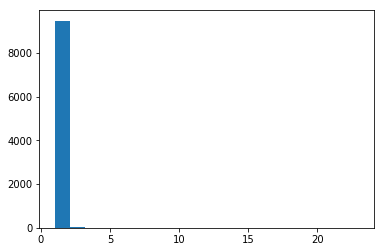

In [11]:
plt.hist(threads["length"], bins=20)

Get the number of participants from the thread

In [12]:
threads["participants_count"] = threads["participants"].apply(lambda x:len(x))

Plot the participants count of threads in histogram

(array([9.148e+03, 1.700e+02, 6.700e+01, 8.700e+01, 1.700e+01, 1.100e+01,
        1.800e+01, 4.000e+00, 2.000e+00, 3.000e+00, 3.000e+00, 2.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([  1.  ,  30.75,  60.5 ,  90.25, 120.  , 149.75, 179.5 , 209.25,
        239.  , 268.75, 298.5 , 328.25, 358.  , 387.75, 417.5 , 447.25,
        477.  , 506.75, 536.5 , 566.25, 596.  ]),
 <a list of 20 Patch objects>)

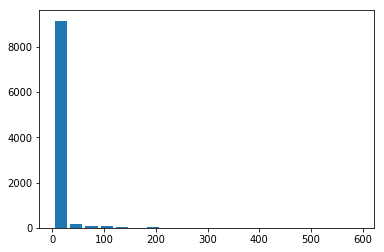

In [13]:
plt.hist(threads["participants_count"], bins=20, rwidth=0.8)

Display the head of threads dataframe

In [14]:
threads.head()

,id,subject,participants,emails,length,participants_count
<7899885.1075852855135.JavaMail.evans@thyme>,<13208718.1075855049878.JavaMail.evans@thyme>,Ward 26Apr. Please review and approve the add...,"[kim.ward@enron.com, diane.fitzgerald@travelpa...",[<7899885.1075852855135.JavaMail.evans@thyme>],1,2
<55018.1075843403126.JavaMail.evans@thyme>,<13208718.1075855049878.JavaMail.evans@thyme>,Enron Mentions,"[karen.denne@enron.com, laura.schwartz@enron.c...","[<4863623.1075849425796.JavaMail.evans@thyme>,...",11,12
<25468664.1075841181694.JavaMail.evans@thyme>,<13208718.1075855049878.JavaMail.evans@thyme>,UPDATE: Supported Internet Email Addresses,"[administration.enron@enron.com, dl-ga-all_enr...",[<25468664.1075841181694.JavaMail.evans@thyme>],1,2
<14120618.1075858576673.JavaMail.evans@thyme>,<13208718.1075855049878.JavaMail.evans@thyme>,2001 Internal Communications Survey,"[ic@enron.com, gerald.nemec@enron.com]",[<14120618.1075858576673.JavaMail.evans@thyme>],1,2
<31417518.1075851751369.JavaMail.evans@thyme>,<13208718.1075855049878.JavaMail.evans@thyme>,Clark County Deal,"[edward.sacks@enron.com, jason.williams@enron....",[<31417518.1075851751369.JavaMail.evans@thyme>...,2,2


Check few mails in the thread.

In [15]:
i = 0
for id, thread in threads.iterrows():
    if i == 5: break 
    if thread['length'] > 1:
        i += 1
        for email in thread['emails']:
            print('SUBJECT: ' + df.loc[email]['Subject'], end="\n\n")
            print(df.loc[email]['content'])
            print('\n\n--------------New email-------------')
        print('\n\n-----------New thread------------\n\n')

SUBJECT: Enron Mentions

California and Energy Providers in Talks Over Electric Fees
The New York Times, 06/26/01

Taking No Chances; Disaster-Conscious Firms Treat Global Warming as a Reality
The Washington Post, 06/26/01

Conflict of Interest
Los Angeles Times, 06/26/01

India Flagging Asset Sales Risk Lower Moody's Outlook (Update2)
Bloomberg, 06/26/01

SMARTMONEY.COM: California Dreamin'
Dow Jones News Service, 06/25/01

Much Calif Power Price Gouging Beyond FERC's Reach -ISO
Dow Jones Energy Service, 06/25/01

Oregon House May Vote Monday On Electricity Deregulation
Dow Jones Energy Service, 06/25/01

USA: Fresh look at wind energy blows to US from Europe.
Reuters English News Service, 06/25/01

USA: UPDATE 3-Some $15 billion at stake in US power refund talks.
Reuters English News Service, 06/25/01

USA: FPL starts wind farm to power 10,500 Wisc. homes.
Reuters English News Service, 06/25/01

USA: Calif says power refund demand will top $9 billion.
Reuters English News Service, 06